# Random Signals #

Show:
- Uniform distribution and its probability distribution
- Gaussian distribution and its probability distribution


In [20]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

Zunächst schauen wir uns zwei verschiedene Verteilungsdichtefunktionen an, normal- oder gaussverteilte Folgen und gleichverteilte Folgen.

In [ ]:
N = 10000 # number of data points
N_bins = 50 # number of bins for histograms
n = arange(N) # array 0 ... N
t = n / N     # array 0 ... 1
Delta = 2
x_uniform = np.random.rand(N) * Delta

sigma = 2
x_norm = np.random.randn(N) * sigma
x_norm_filt = sig.lfilter(np.ones(50)/50, 1, x_norm)
x_sigma = np.arange(-8, 8, 0.001)
y_sigma = norm.pdf(x_sigma, 0, sigma)# Gaussian bell curve, mean = 0, sigma = 2.

D:\Programme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


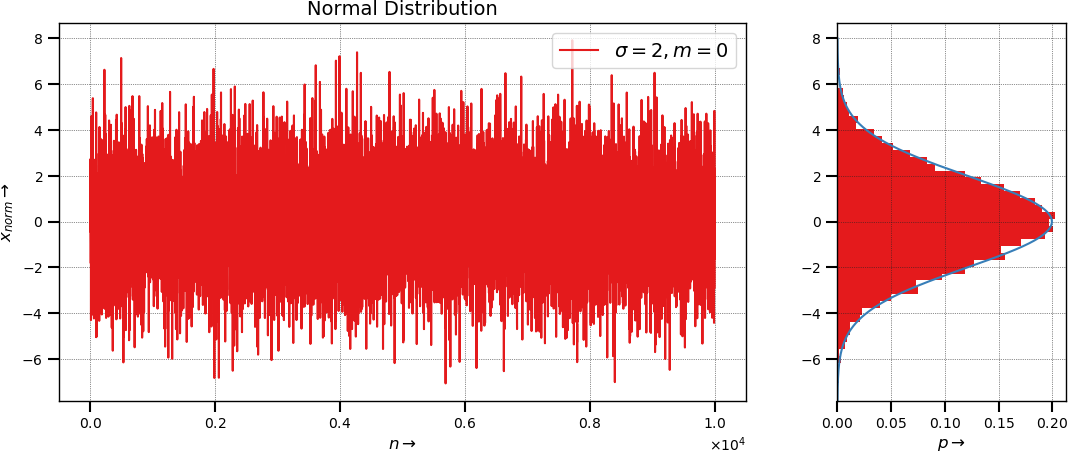

In [32]:
# generate a nice plot
fig0 = plt.figure(0, figsize=(13,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax13 = plt.subplot(gs[0])
ax13.set_title('Normal Distribution')
ax13.plot(n, x_norm, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$n \rightarrow$');
ax13.set_ylabel(r'$x_{norm}\rightarrow$')
ax14= plt.subplot(gs[1])
#ax14.plot(hist)
ax14.hist(x_norm, bins=N_bins, range=None, normed=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax14.plot(y_sigma, x_sigma)
ax14.set_xlabel(r'$p \rightarrow$')
ax14.set_ylim(ax13.get_ylim())
fig1.savefig("gauss.svg")

D:\Programme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


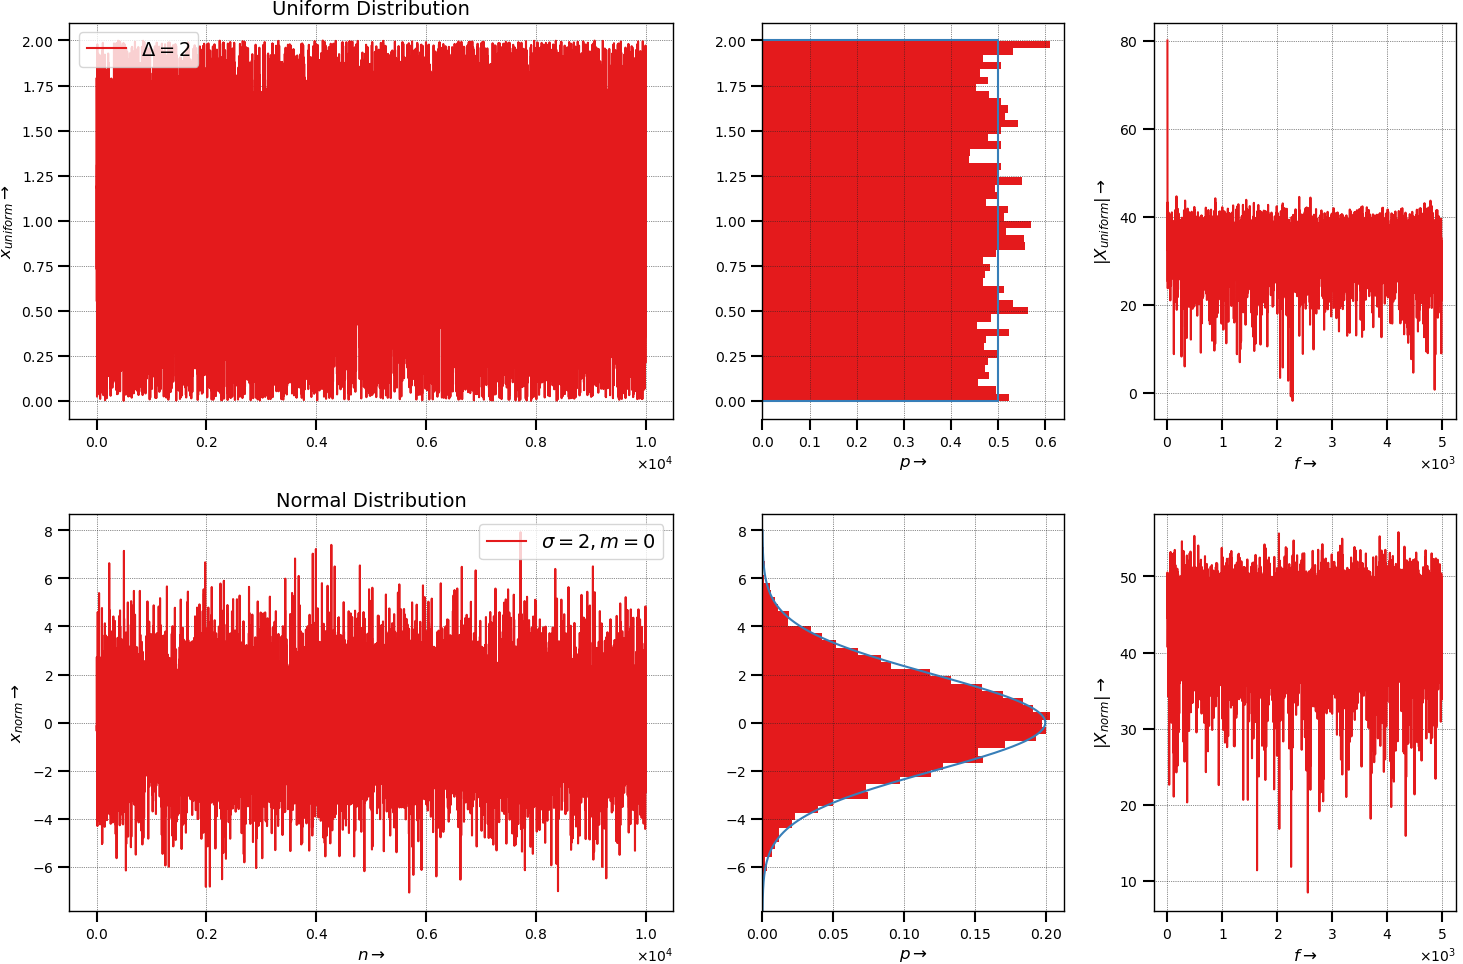

In [28]:
fig1 = plt.figure(1)
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Uniform Distribution')
ax11.plot(n, x_uniform, label = r'$\Delta = {0}$'.format(Delta))
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x_{uniform} \rightarrow$')
ax12 = plt.subplot(gs[1])
ax12.hist(x_uniform, bins=N_bins, range=None, normed=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax12.plot([0, 1/Delta, 1/Delta, 0],[0,0,Delta,Delta])
ax12.set_xlabel(r'$p \rightarrow$')
ax12.set_ylim(ax11.get_ylim())
ax13 = plt.subplot(gs[2])
ax13.plot(20*np.log10(np.abs(np.fft.fft(x_uniform)[:N//2])))
ax13.set_xlabel(r'$f \rightarrow$')
ax13.set_ylabel(r'$|X_{uniform}|\rightarrow$')
#
ax14 = plt.subplot(gs[3])
ax14.set_title('Normal Distribution')
ax14.plot(n, x_norm, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax14.legend(fontsize = 14)
ax14.set_xlabel(r'$n \rightarrow$');
ax14.set_ylabel(r'$x_{norm}\rightarrow$')
ax15= plt.subplot(gs[4])
#ax14.plot(hist)
ax15.hist(x_norm, bins=N_bins, range=None, normed=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax15.plot(y_sigma, x_sigma)
ax15.set_xlabel(r'$p \rightarrow$')
ax15.set_ylim(ax14.get_ylim())
ax16 = plt.subplot(gs[5])
ax16.plot(20*np.log10(np.abs(np.fft.fft(x_norm)[:N//2])))
ax16.set_xlabel(r'$f \rightarrow$')
ax16.set_ylabel(r'$|X_{norm}|\rightarrow$')
#
fig1.tight_layout()
plt.show()

Wenn man die Zufallsprozesse filtert, ändert sich in der Zeitebene wenig und in der Amplitudenverteilung gar nichts. Das Spektrum ist jetzt natürlich nicht mehr weiß:

D:\Programme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


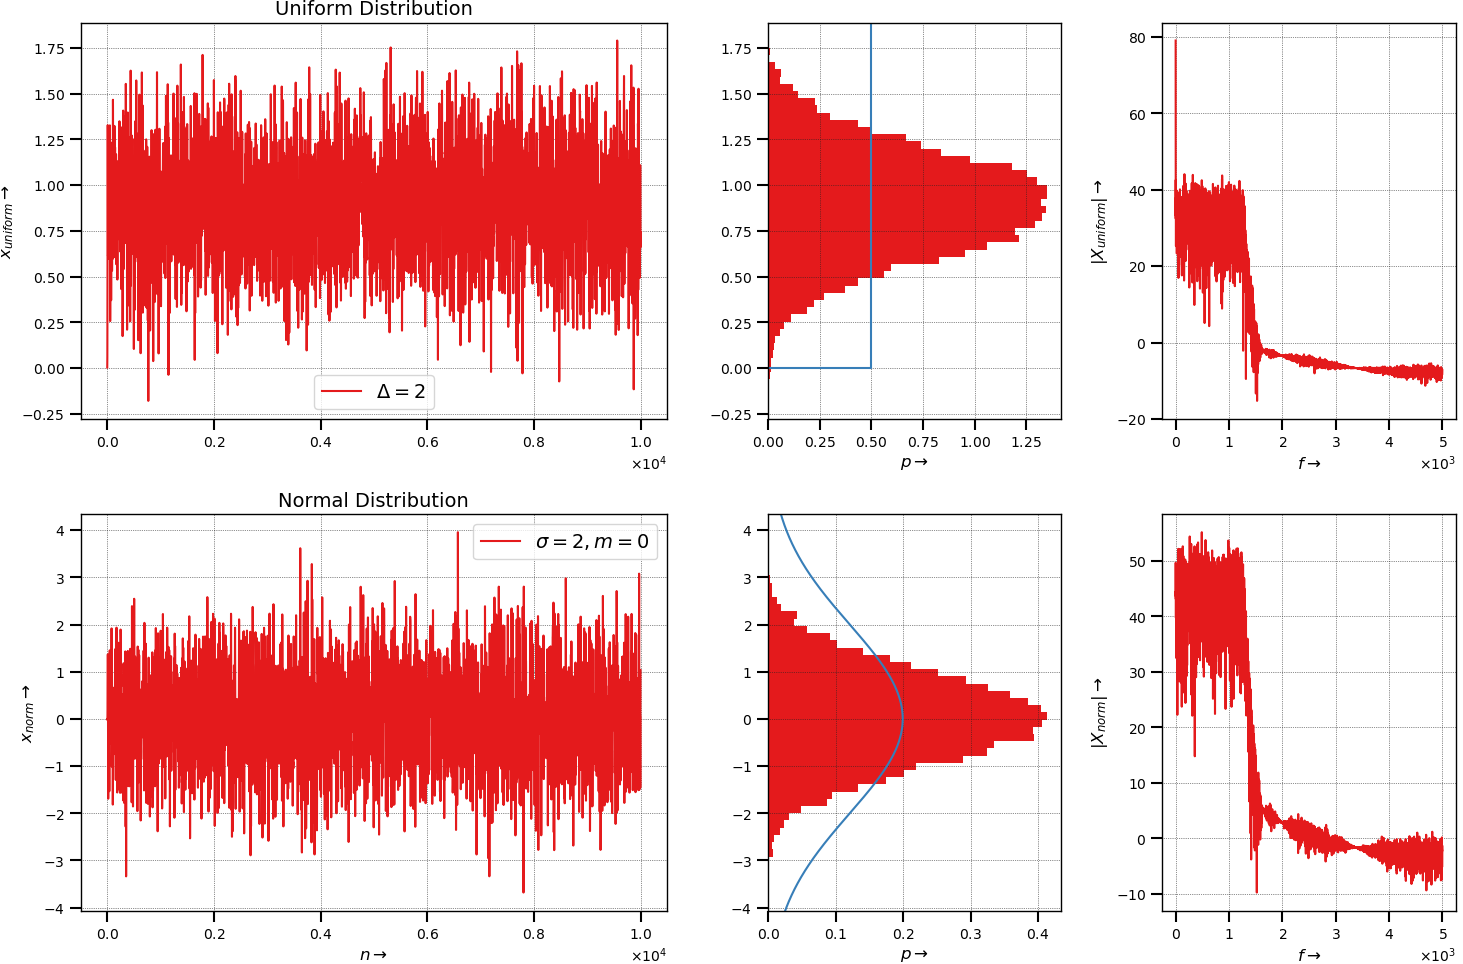

In [30]:
#x_uniform_filt = sig.lfilter(np.ones(50)/50, 1, x_uniform)
b, a = sig.iirfilter(6, [0.25], rs=60, rp=1, btype='lowpass', ftype='ellip') # define filter
x_uniform_filt = sig.lfilter(b, a, x_uniform)
x_norm_filt = sig.lfilter(b, a, x_norm)

fig2 = plt.figure(2)
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Uniform Distribution')
ax11.plot(n, x_uniform_filt, label = r'$\Delta = {0}$'.format(Delta))
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x_{uniform} \rightarrow$')
ax12 = plt.subplot(gs[1])
ax12.hist(x_uniform_filt, bins=N_bins, range=None, normed=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax12.plot([0, 1/Delta, 1/Delta, 0],[0,0,Delta,Delta])
ax12.set_xlabel(r'$p \rightarrow$')
ax12.set_ylim(ax11.get_ylim())
ax13 = plt.subplot(gs[2])
ax13.plot(20*np.log10(np.abs(np.fft.fft(x_uniform_filt)[:N//2])))
ax13.set_xlabel(r'$f \rightarrow$')
ax13.set_ylabel(r'$|X_{uniform}|\rightarrow$')
#
ax14 = plt.subplot(gs[3])
ax14.set_title('Normal Distribution')
ax14.plot(n, x_norm_filt, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax14.legend(fontsize = 14)
ax14.set_xlabel(r'$n \rightarrow$');
ax14.set_ylabel(r'$x_{norm}\rightarrow$')
ax15= plt.subplot(gs[4])
#ax14.plot(hist)
ax15.hist(x_norm_filt, bins=N_bins, range=None, normed=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax15.plot(y_sigma, x_sigma)
ax15.set_xlabel(r'$p \rightarrow$')
ax15.set_ylim(ax14.get_ylim())
ax16 = plt.subplot(gs[5])
ax16.plot(20*np.log10(np.abs(np.fft.fft(x_norm_filt)[:N//2])))
ax16.set_xlabel(r'$f \rightarrow$')
ax16.set_ylabel(r'$|X_{norm}|\rightarrow$')
#
fig2.tight_layout()
plt.show()

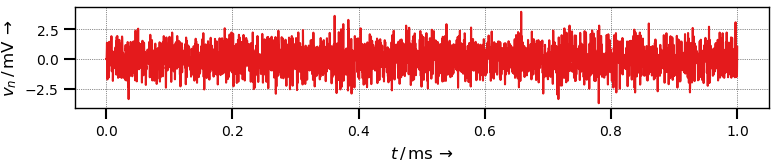

In [35]:
# another nice plot
fig3 = plt.figure(3, figsize=(8,2))
ax1 = fig3.add_subplot(111)
ax1.plot(t, x_norm_filt, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax1.set_xlabel(r'$t \,/ \, \mathrm{ms}\, \rightarrow$');
ax1.set_ylabel(r'$v_n \,/ \,\mathrm{mV} \,\rightarrow$');
fig3.tight_layout()
fig3.savefig("random.svg", transparent=True, pad_inches=0)
plt.show()

D:\Programme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


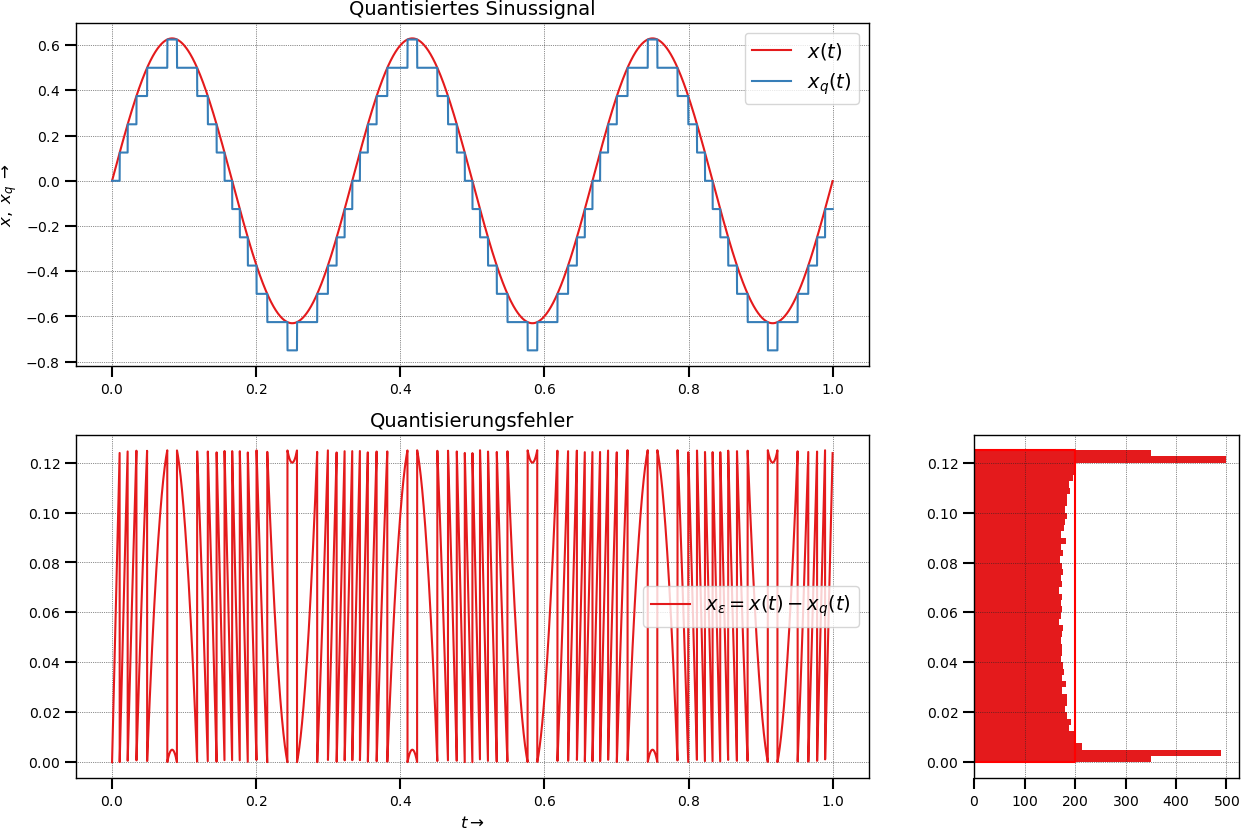

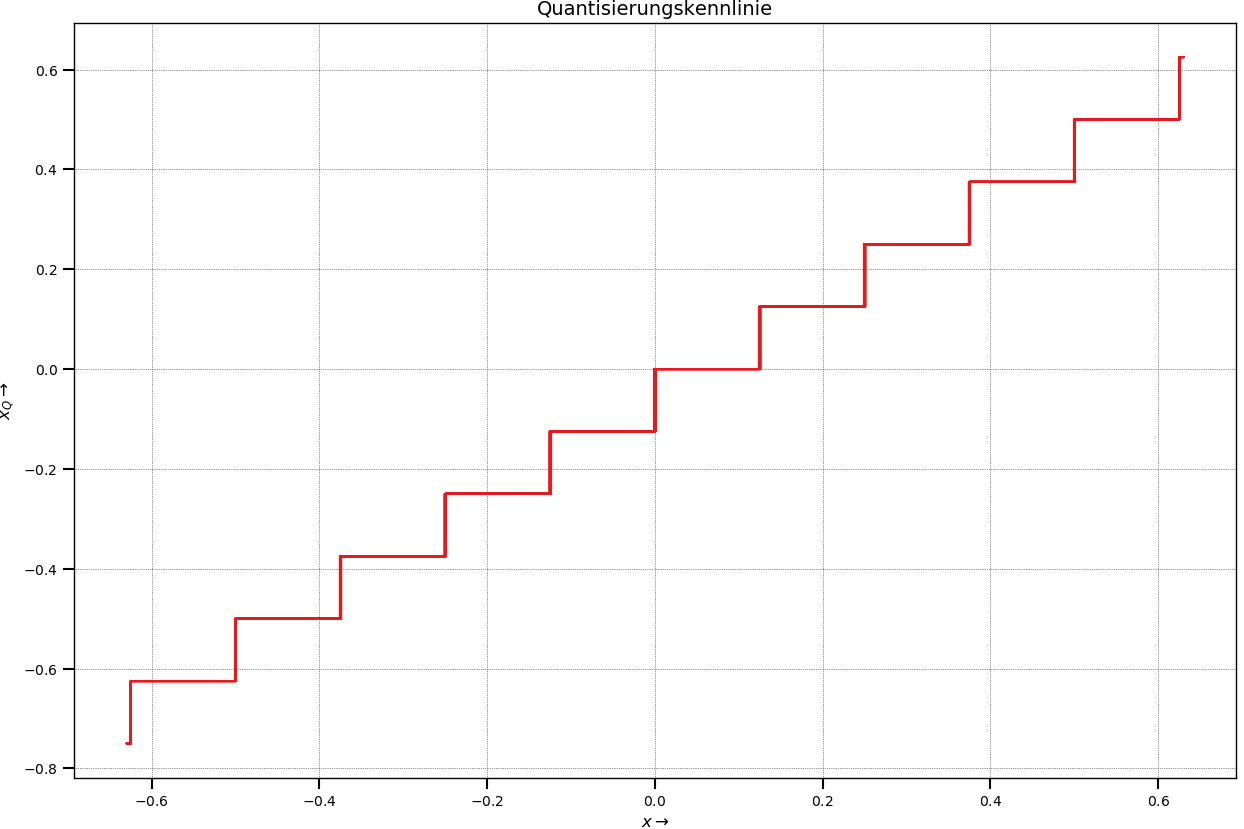

In [36]:
t = linspace(0, 1, N, endpoint=False)
x = sin(2*pi*t*3)*0.63
r = np.random.randn(N)

#q_obj = (0, 4, 'round', 'sat') # try 'round' ; 'sat'
q_obj = {'QI':1, 'QF': 3, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'
#q_obj = {'OVFL':'sat'}

fx_x = fx.Fixed(q_obj)

x_q = fx_x.fix(x) # quantize x
x_eps = x - x_q # quantization error
#
fig1 = plt.figure(1)
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Quantisiertes Sinussignal')
ax11.plot(t, x, label = r'$x(t)$')
ax11.plot(t, x_q, label = r'$x_q(t)$')
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x, \;x_q \; \rightarrow$')
ax13 = plt.subplot(gs[2])
ax13.set_title('Quantisierungsfehler')
ax13.plot(t, x_eps, label = r'$x_{\epsilon} = x(t) - x_q(t)$')
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$t \rightarrow$');
ax14= plt.subplot(gs[3])
#ax14.plot(hist)
ax14.hist(x_eps, bins=N_bins, 
                       range=None, 
                       normed=False, 
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype=u'bar', 
                       align=u'mid', 
                       orientation=u'horizontal', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False)
ax14.plot([0, N/50, N/50, 0],[0,0,fx_x.LSB,fx_x.LSB], 'r-')
#
fig2 = plt.figure(2)
ax21 = fig2.add_subplot(111)
ax21.set_title('Quantisierungskennlinie')
ax21.step(x,x_q, where = 'post')
ax21.set_xlabel(r'$x \rightarrow$')
ax21.set_ylabel(r'$x_Q \rightarrow$');
#plt.show()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.